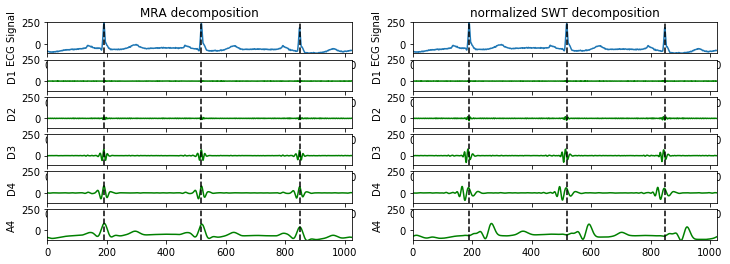

In [1]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

ecg = pywt.data.ecg()

wavelet = pywt.Wavelet('db8')  #'db16')
level = 4
coeffs = pywt.mra(ecg, wavelet=wavelet, level=level)
ca = coeffs[0]
details = coeffs[1:]

# Create a plot using the same axis limits for all coefficient arrays to
# illustrate the preservation of alignment across decomposition levels.
ylim = [ecg.min(), ecg.max()]

def mark_peaks(ax):
    # add dashed lines at the locations of the ECG peaks for reference
    ylim = ax.get_ylim()
    ax.plot([190, 190], ylim, 'k--')
    ax.plot([518, 518], ylim, 'k--')
    ax.plot([848, 848], ylim, 'k--')

fig, axes = plt.subplots(len(coeffs) + 1, 2, figsize=[12, 4])
axes[0][0].set_title("MRA decomposition")
axes[0][0].plot(ecg)
axes[0][0].set_ylabel('ECG Signal')
axes[0][0].set_xlim(0, len(ecg) - 1)
axes[0][0].set_ylim(ylim[0], ylim[1])
mark_peaks(axes[0][0])

for i, x in enumerate(coeffs):
    ax = axes[-i - 1][0]
    ax.plot(coeffs[i], 'g')
    if i == 0:
        ax.set_ylabel("A%d" % (len(coeffs) - 1))
    else:
        ax.set_ylabel("D%d" % (len(coeffs) - i))
    # Scale axes
    ax.set_xlim(0, len(ecg) - 1)
    ax.set_ylim(ylim[0], ylim[1])
    mark_peaks(ax)

"""
repeat using the SWT instead of MRA as the decomposition
"""
coeffs = pywt.swt(ecg, wavelet=wavelet, level=level, norm=True, trim_approx=True)
ca = coeffs[0]
details = coeffs[1:]

axes[0][1].set_title("normalized SWT decomposition")
axes[0][1].plot(ecg)
axes[0][1].set_ylabel('ECG Signal')
axes[0][1].set_xlim(0, len(ecg) - 1)
axes[0][1].set_ylim(ylim[0], ylim[1])
mark_peaks(axes[0][1])

for i, x in enumerate(coeffs):
    ax = axes[-i - 1][1]
    ax.plot(coeffs[i], 'g')
    if i == 0:
        ax.set_ylabel("A%d" % (len(coeffs) - 1))
    else:
        ax.set_ylabel("D%d" % (len(coeffs) - i))
    # Scale axes
    ax.set_xlim(0, len(ecg) - 1)
    ax.set_ylim(ylim[0], ylim[1])
    mark_peaks(ax)
